In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

**4.1** Cree una señal que sea la suma de tres componentes sinusoidales con frecuencias de 40, 80 y 160 Hz. Defina la freciencia de muestreo mínima necesaria para respresentar la señal y utilice la frecuencia de muestro necesaria para representarla apropiadamente.

La frecuencia de muestreo debe ser de al menos el doble de la frecuencia máxima, que en este caso es 160 Hz. Por lo tanto la frecuencia de muestreo necesaria para representar adecuadamente la señal debe ser 320 Hz o más. En este caso, se tomará 3200 Hz.

Text(0.5, 0, 'Segundos')

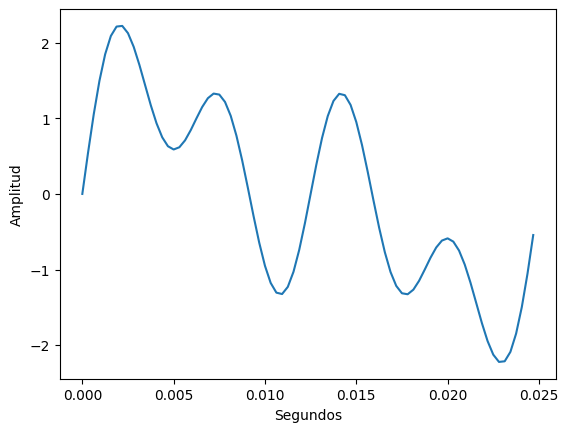

In [11]:
fs=3200 #Hz
time=np.arange(0,0.025,1/fs) #vector de tiempo, periodo 0.025?
frecuencias= [40, 80, 160]
senal=0
for frec in frecuencias:
    x=np.exp(1j*2*np.pi*frec*time) #cos + j sen
    senal+=x
plt.plot(time,np.imag(senal))
plt.ylabel('Amplitud')
plt.xlabel('Segundos')

#en caso de querer modificar las amplitudes, crear vector de amplitudes e ingresar en ciclo

**4.2** Calcule la transformada de Fourier de la señal y grafique el espectro de frecuencia. Identifique en el espectro las frecuencias que componen la señal. Trabaje con 10 periodos de la señal.

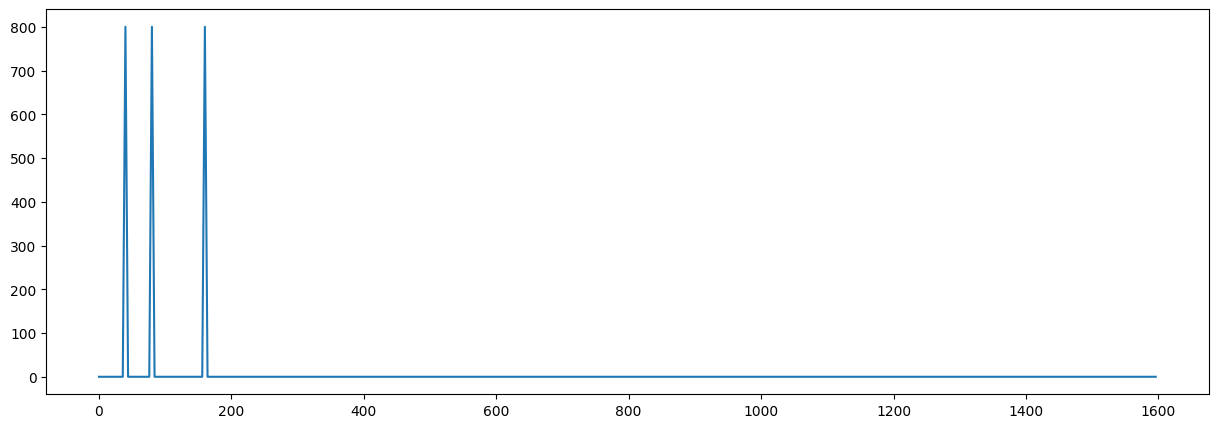

In [12]:
fs=3200 #Hz
time=np.arange(0,0.025*10,1/fs) #vector de tiempo, periodo 0.025?
frecuencias= [40, 80, 160]
senal=0
for frec in frecuencias:
    x=np.exp(1j*2*np.pi*frec*time) #cos + j sen
    senal+=x
Xsenal=np.fft.fft(senal)
nyquist=int(np.ceil(len(Xsenal)/2))
F=np.arange(0,nyquist)*fs/len(Xsenal)
plt.figure(figsize=(15,5))
plt.plot(F,np.abs(Xsenal[0:nyquist]))

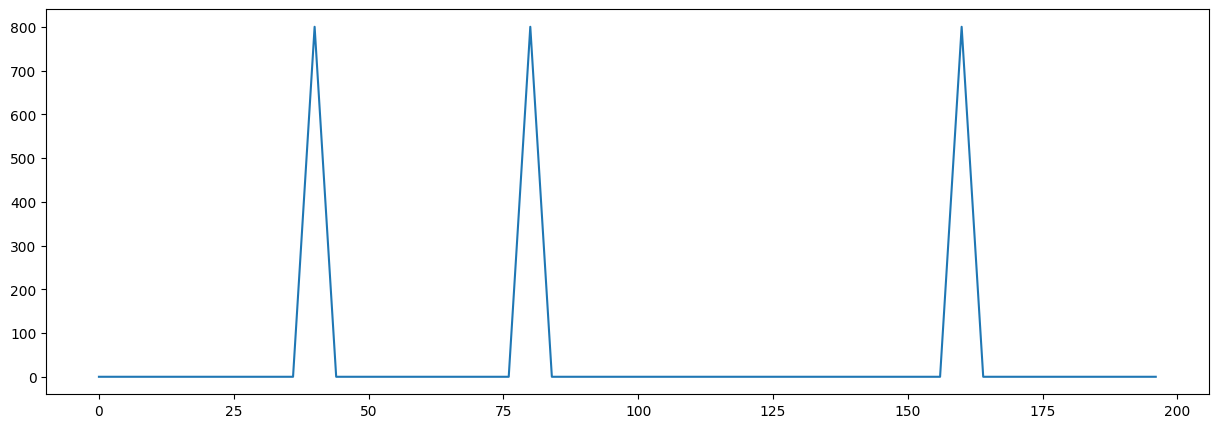

In [13]:
#zoom
plt.figure(figsize=(15,5))
plt.plot(F[0:50],np.abs(Xsenal[0:nyquist])[0:50])

**4.3** Consulte la función que permite realizar el cálculo de la transformada inversa de Fourier. Aplíquelo a la señal anterior.

Existen varias librerias que incluyen funciones para el cálculo de la transformada inversa de fourier como Numpy.fft, Scipy.signal, entre otros. Dado que en el curso se está utlizando la libreria Numpy, la función correspondiente para la transformada inversa de fourier es numpy.fft.ifft

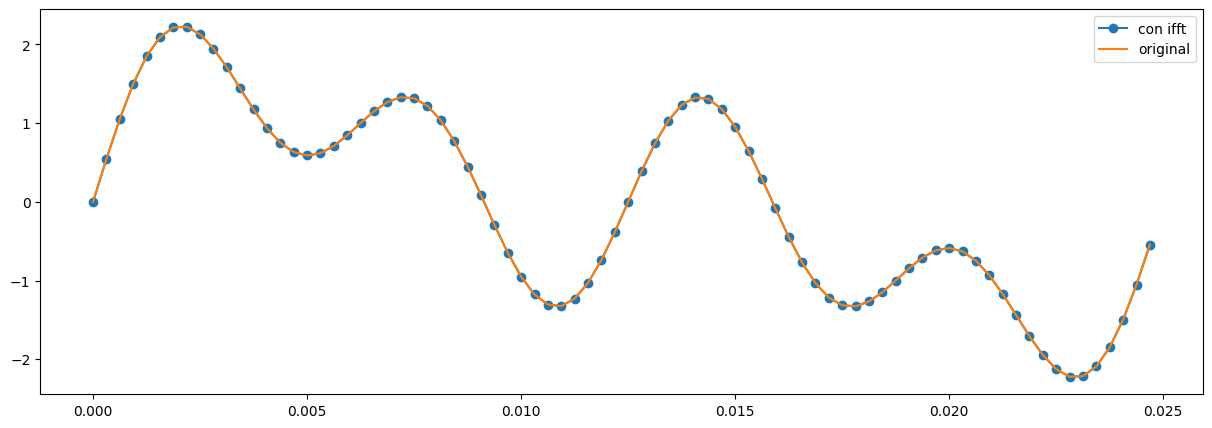

In [14]:
senal_ifft=np.fft.ifft(Xsenal)
plt.figure(figsize=(15,5))
plt.plot(time[0:80],np.imag(senal_ifft)[0:80],marker='o',label='con ifft') #1 periodo
plt.plot(time[0:80],np.imag(senal)[0:80],label='original')
plt.legend()

Como puede verse, la señal a la que se le aplico la transformada inversa es equivalente a la señal original

**4.4** ¿Podría decir que las siguientes líneas aplican un filtro? ¿Por qué?  ...

Si, porque una segmentación en frecuencias es equivalente a aplicar un pasa bandas de la siguiente forma:
F2[9:13] = F1[9:13];: Copia las amplitudes de frecuencia específicas (en este caso, las frecuencias de índice 9 a 12) de F1 a F2. Este paso es lo que se conoce como "segmentación en frecuencias", ya que selecciona y copia solo las componentes de frecuencia dentro de un rango específico.
xr = np.fft.ifft(F2);: Calcula la transformada inversa de Fourier de F2, lo que produce una señal en el dominio del tiempo xr que contiene solo las componentes de frecuencia seleccionadas y filtradas.
ax.plot(t, np.real(xr)): Finalmente, se grafica la parte real de la señal filtrada xr en función del tiempo t.

Extraiga de manera similar cada una de las componentes de la señal

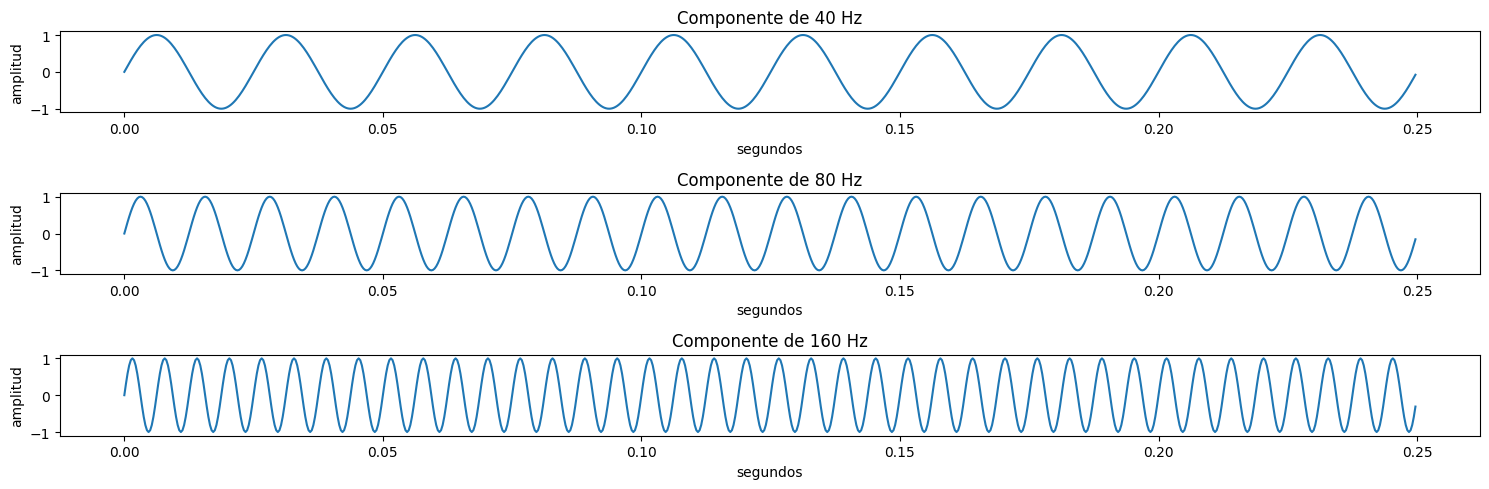

In [15]:
comp1=np.zeros(len(Xsenal))
comp2=np.zeros(len(Xsenal))
comp3=np.zeros(len(Xsenal))
comp1[0:15]=np.abs(Xsenal)[0:15] #40Hz
comp2[15:30]=np.abs(Xsenal)[15:30] #80Hz
comp3[35:45]=np.abs(Xsenal)[35:45] #160Hz
comps= [comp1,comp2,comp3]
plt.figure(figsize=(15,5))
for i in range(0,3):
    plt.subplot(3,1,i+1)
    plt.plot(time,np.imag(np.fft.ifft(comps[i])))
    plt.title(f'Componente de {frecuencias[i]} Hz')
    plt.xlabel('segundos')
    plt.ylabel('amplitud')
plt.tight_layout()

**4.5** El archivo adjunto (senecg.mat) contiene una señal de ECG adquirida a una frecuencia de muestreo de 250 Hz. Realice un análisis en frecuencia de la señal usando periodograms de Welch y determine si es necesario eliminar ruido, en tal caso, elimínelo de la forma que se mostró antes y compruebe que lo haya realizado, calcule la transformada inversa de Fourier de la señal filtrada y compruebe con el periodograma. (Usar una ventana hanning, y justificar la elección del solapamiento y el ancho de la ventana)

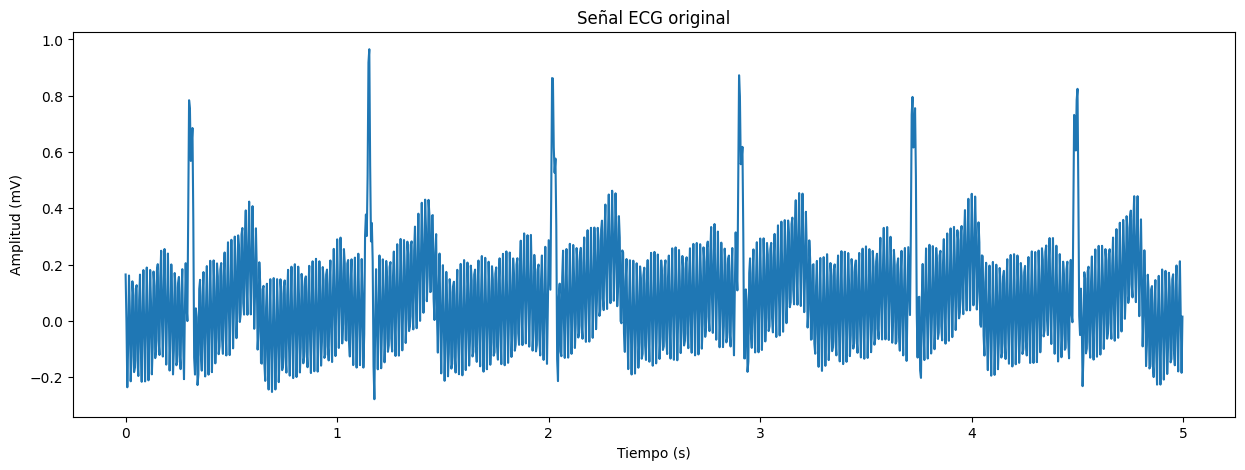

Forma de la señal ECG: (1250, 1)
Primeros valores de la señal ECG: [[ 0.16479384]
 [-0.00455636]
 [-0.23589197]
 [-0.083984  ]
 [ 0.16115376]
 [ 0.03975585]
 [-0.21464599]
 [-0.12484285]
 [ 0.14056194]
 [ 0.08944186]]


In [17]:
from scipy.io import loadmat
from scipy.signal import welch
from numpy import hanning
import scipy.io as sio
import scipy.signal as sp

data = loadmat('senecg.mat')
ecg_signal = data['ECG']
fs = 250  # Frecuencia de muestreo (Hz)

# Visualizar la señal ECG original
plt.figure(figsize=(15, 5))
plt.plot(np.arange(0, len(ecg_signal) / fs, 1 / fs), ecg_signal)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (mV)')
plt.title('Señal ECG original')
plt.show()
# Imprimir la forma de la señal para verificar su longitud
print("Forma de la señal ECG:", ecg_signal.shape)

# Imprimir los primeros valores de la señal para verificar su contenido
print("Primeros valores de la señal ECG:", ecg_signal[:10])  # Imprime los primeros 10 valores como ejemplo

Análisis de frecuencia con periodogramas de Welch:

In [19]:
import scipy.signal as sp
from scipy.signal import welch

# Definir la longitud de la señal ECG y calcular los parámetros nperseg y noverlap
ecg_length = len(ecg_signal)
nperseg_value = min(ecg_length, 512)  # Definir un máximo de 512 como ejemplo
noverlap_value = min(nperseg_value // 2, ecg_length - 1)

# Calcular y graficar el periodograma de Welch para analizar la señal en frecuencia
f_welch, Pxx_welch = welch(ecg_signal.flatten(), fs=fs, window='hann', nperseg=nperseg_value, noverlap=noverlap_value)



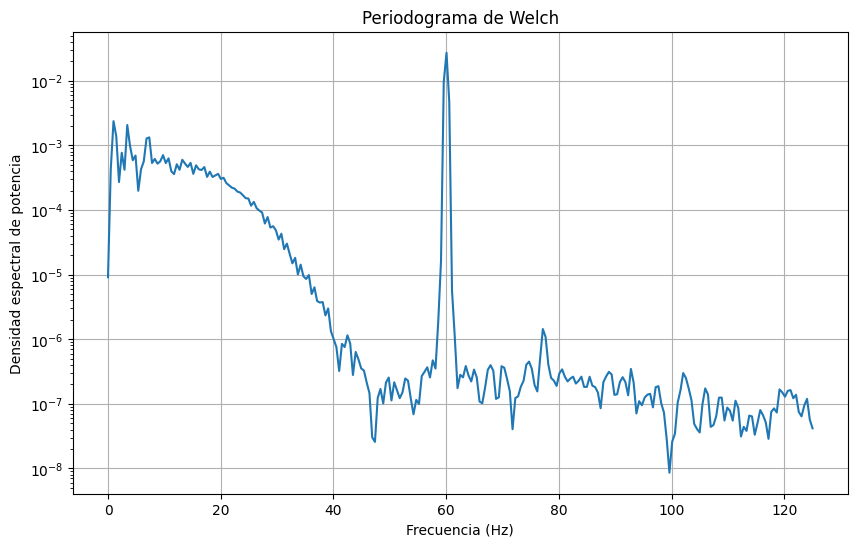

In [27]:
# Graficar el periodograma de Welch
plt.figure(figsize=(10, 6))
plt.semilogy(f_welch, Pxx_welch)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad espectral de potencia')
plt.title('Periodograma de Welch')
plt.grid(True)
plt.show()

Las frecuencias que podríamos considerar como ruido en una señal de ECG suelen estar fuera del rango de frecuencias típicas de la actividad cardíaca, que es aproximadamente de 0.5 a 100 Hz. Por lo tanto, frecuencias extremadamente altas o bajas podrían considerarse como ruido en este contexto.

Por ejemplo, en el código que aplicamos anteriormente, el filtro pasabandas se diseñó para filtrar frecuencias fuera del rango de 8 a 12 Hz, lo cual sugiere que frecuencias fuera de este rango podrían considerarse como ruido en la señal de ECG

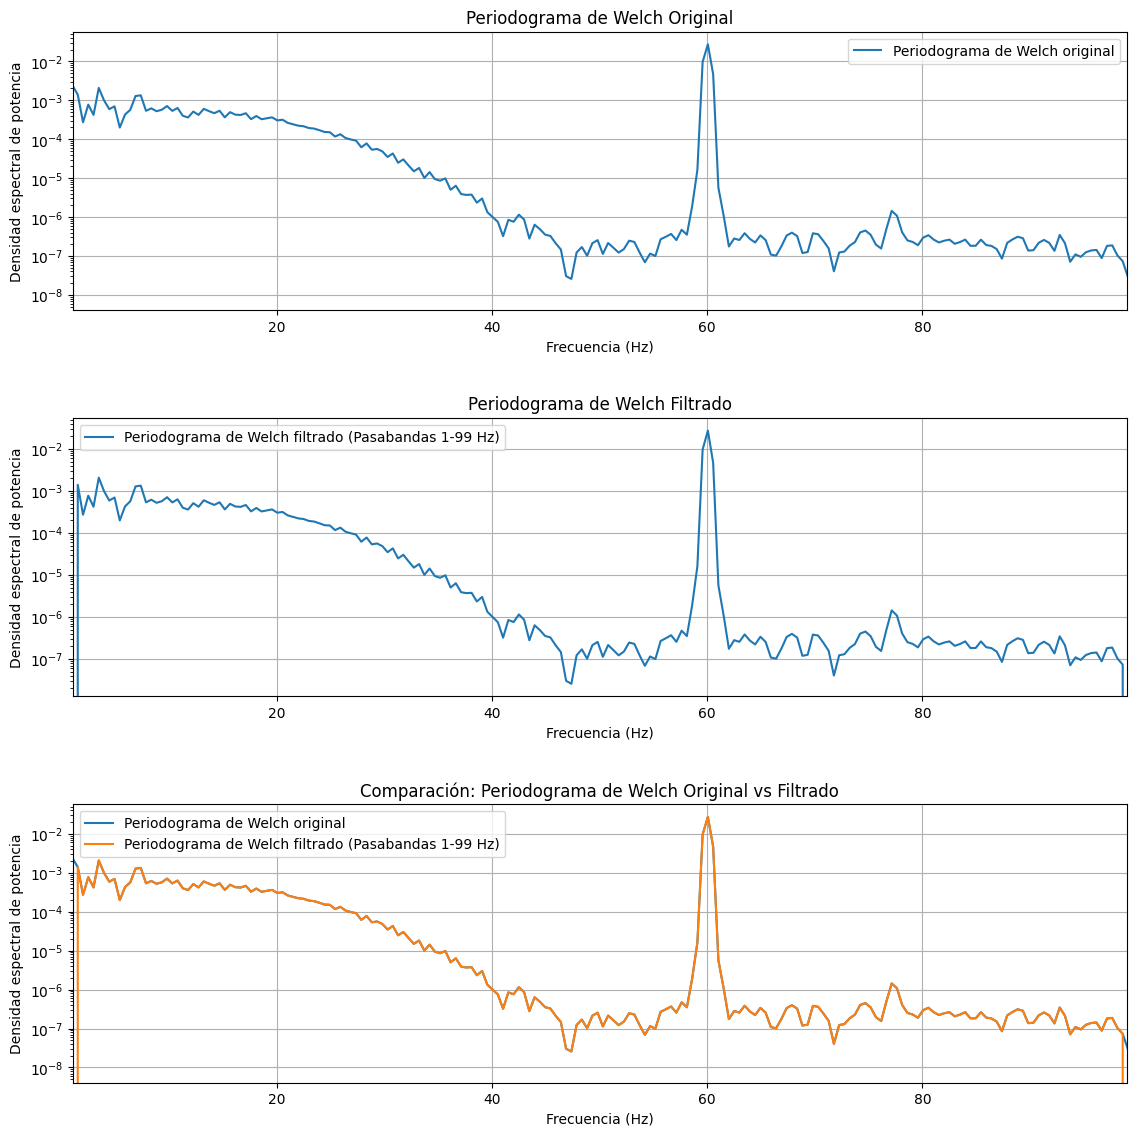

In [103]:
# Aplicar un filtro similar al del punto 4.4 al periodograma de Welch
filtered_Pxx_welch = Pxx_welch.copy()
filtered_Pxx_welch[(f_welch < 1) | (f_welch > 99)] = 0

# Graficar las tres señales en subgráficos separados
plt.figure(figsize=(12, 12))

# Gráfico 1: Periodograma de Welch original
plt.subplot(311)
plt.semilogy(f_welch, Pxx_welch, label='Periodograma de Welch original')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad espectral de potencia')
plt.title('Periodograma de Welch Original')
plt.xlim(1, 99)  # Limitar el eje x de 1 a 99 Hz
plt.legend()
plt.grid(True)

# Añadir espacio entre subgráficos
plt.tight_layout(pad=3.0)

# Gráfico 2: Periodograma de Welch filtrado
plt.subplot(312)
plt.semilogy(f_welch, filtered_Pxx_welch, label='Periodograma de Welch filtrado (Pasabandas 1-99 Hz)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad espectral de potencia')
plt.title('Periodograma de Welch Filtrado')
plt.xlim(1, 99)  # Limitar el eje x de 1 a 99 Hz
plt.legend()
plt.grid(True)

# Añadir espacio entre subgráficos
plt.tight_layout(pad=3.0)

# Gráfico 3: Comparación del periodograma de Welch original y filtrado
plt.subplot(313)
plt.semilogy(f_welch, Pxx_welch, label='Periodograma de Welch original')
plt.semilogy(f_welch, filtered_Pxx_welch, label='Periodograma de Welch filtrado (Pasabandas 1-99 Hz)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad espectral de potencia')
plt.title('Comparación: Periodograma de Welch Original vs Filtrado')
plt.xlim(1, 99)  # Limitar el eje x de 1 a 99 Hz
plt.legend()
plt.grid(True)

# Añadir espacio entre subgráficos
plt.tight_layout(pad=3.0)

plt.show()

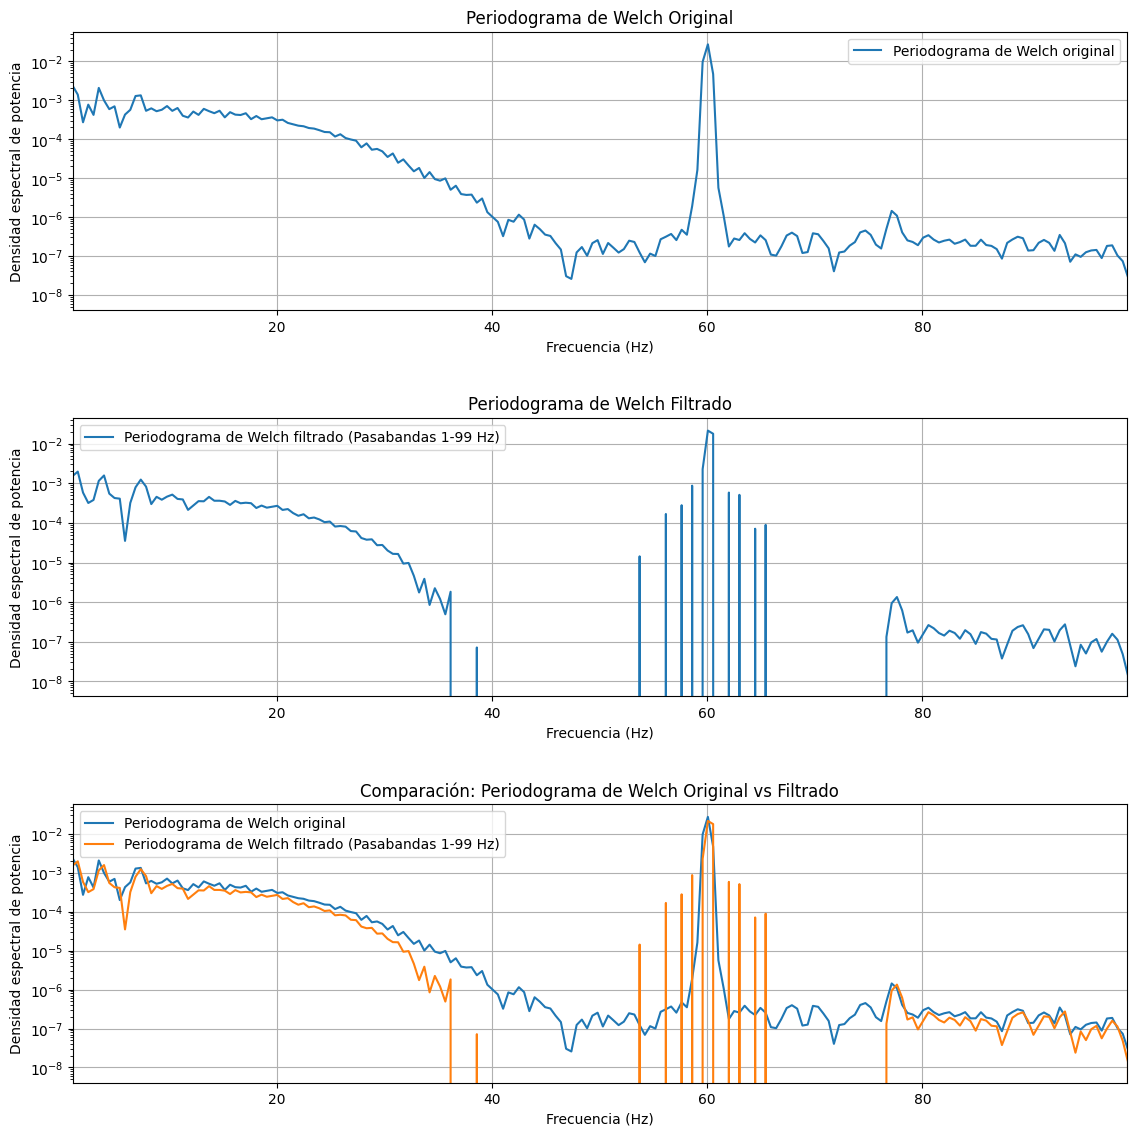

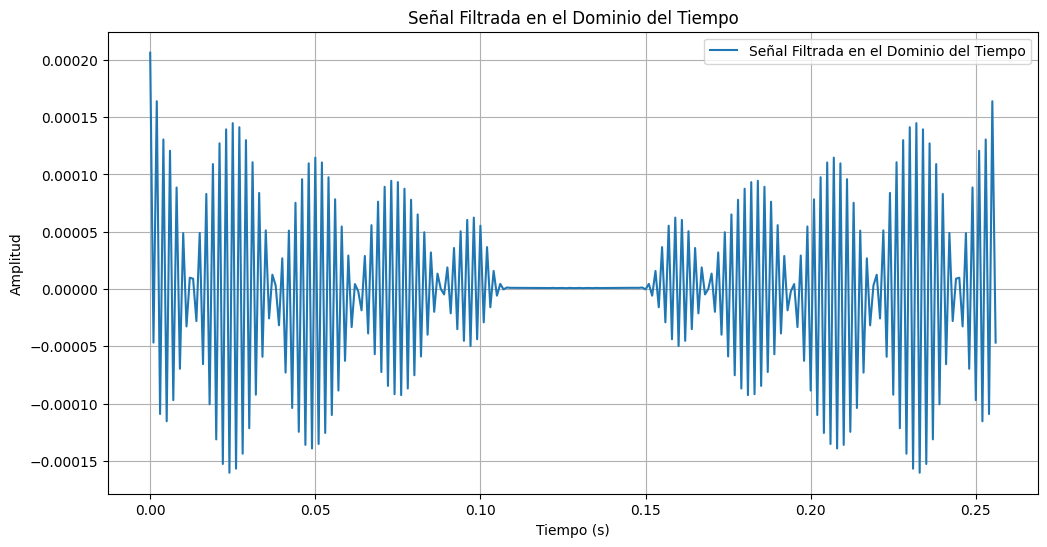

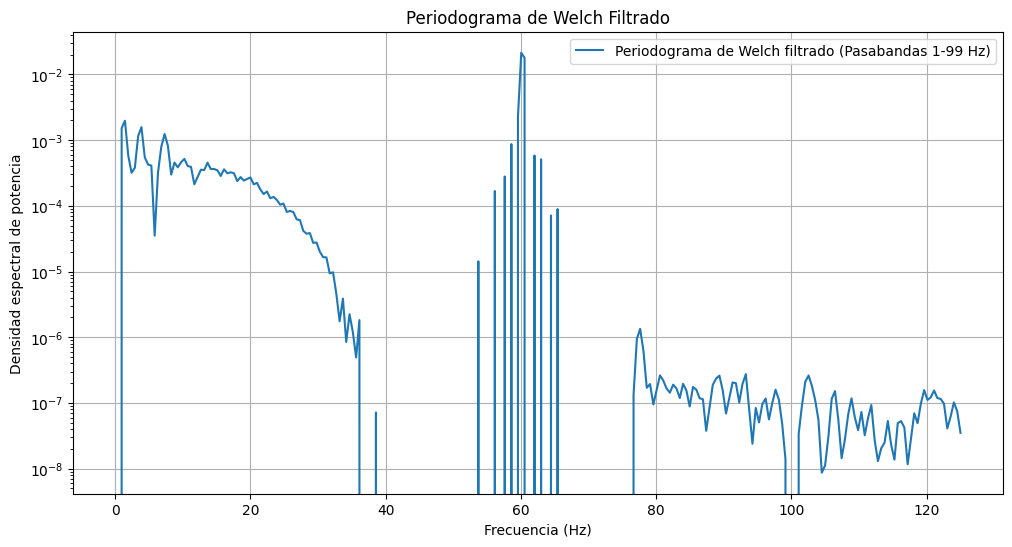

In [127]:
# Calcular la IFFT del periodograma de Welch filtrado para obtener la señal en el dominio del tiempo
filtered_signal = np.fft.ifft(filtered_Pxx_welch)

# Calcular el tiempo para la señal en el dominio del tiempo
t_signal = np.arange(0, len(filtered_signal) / fs, 1 / fs)

# Graficar las tres señales en subgráficos separados
plt.figure(figsize=(12, 12))

# Gráfico 1: Periodograma de Welch original
plt.subplot(311)
plt.semilogy(f_welch, Pxx_welch, label='Periodograma de Welch original')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad espectral de potencia')
plt.title('Periodograma de Welch Original')
plt.xlim(1, 99)  # Limitar el eje x de 1 a 99 Hz
plt.legend()
plt.grid(True)

# Añadir espacio entre subgráficos
plt.tight_layout(pad=3.0)

# Gráfico 2: Periodograma de Welch filtrado
plt.subplot(312)
plt.semilogy(f_welch, filtered_Pxx_welch, label='Periodograma de Welch filtrado (Pasabandas 1-99 Hz)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad espectral de potencia')
plt.title('Periodograma de Welch Filtrado')
plt.xlim(1, 99)  # Limitar el eje x de 1 a 99 Hz
plt.legend()
plt.grid(True)

# Añadir espacio entre subgráficos
plt.tight_layout(pad=3.0)

# Gráfico 3: Comparación del periodograma de Welch original y filtrado
plt.subplot(313)
plt.semilogy(f_welch, Pxx_welch, label='Periodograma de Welch original')
plt.semilogy(f_welch, filtered_Pxx_welch, label='Periodograma de Welch filtrado (Pasabandas 1-99 Hz)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad espectral de potencia')
plt.title('Comparación: Periodograma de Welch Original vs Filtrado')
plt.xlim(1, 99)  # Limitar el eje x de 1 a 99 Hz
plt.legend()
plt.grid(True)

# Añadir espacio entre subgráficos
plt.tight_layout(pad=3.0)

plt.show()

# Graficar la señal filtrada en el dominio del tiempo y compararla con el periodograma de Welch filtrado
plt.figure(figsize=(12, 6))

# Graficar la señal filtrada en el dominio del tiempo
plt.plot(t_signal, np.real(filtered_signal), label='Señal Filtrada en el Dominio del Tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal Filtrada en el Dominio del Tiempo')
plt.legend()
plt.grid(True)
plt.show()

Hicimos la elección del solapamiento y el ancho de la ventana en el periodograma de Welch, teniendo en cuenta que el solapamiento y el tamaño de la ventana están relacionados con la resolución en frecuencia y tiempo de la transformada de Fourier de corto tiempo (STFT). El solapamiento controla la resolución en tiempo (un mayor solapamiento proporciona una mejor resolución en tiempo pero más varianza), mientras que el ancho de la ventana controla la resolución en frecuencia (una ventana más ancha proporciona una mejor resolución en frecuencia pero peor resolución en tiempo). La elección de estos parámetros depende de las características específicas de la señal y del análisis que estés realizando. 

**4.6** Realice un análisis de frecuencia a través del periodograma de welch de una señal de EEG de un paciente Sano y otra de un paciente con Parkinson de algún canal que en el proyecto 1 hayan identificado que presentaba diferencias, si no encontró diferencias, elija un par al azar. Realice un análisis comparativo de las señales según lo que le indiquen los periodogramas. (Usar una ventana Hanning, y justificar la elección del solapamiento y el ancho de la ventana)

In [128]:
#Carga de datos (pacientes seleccionados al azar)
import os
import scipy.io as sio
directorio=os.getcwd()
control_t=sio.loadmat(directorio+'/C012_EP_reposo.mat')['data']
parkinson_t=sio.loadmat(directorio+'/p016_EP_reposo.mat')['data']

In [129]:
#Selección de canal y definición de vectores de tiempo
fs = 1000 #frec muestreo
num_canales = 8 #Channels = 'C3' 'C1' 'CZ' 'C2' 'C4' 'O1' 'OZ' 'O2'
control=np.reshape(control_t,(control_t.shape[0],control_t.shape[1]*control_t.shape[2]),order='F')[2,:] #CZ
parkinson=np.reshape(parkinson_t,(parkinson_t.shape[0],parkinson_t.shape[1]*parkinson_t.shape[2]),order='F')[2,:] #CZ
t_control=np.linspace(0,(control.shape[0])/fs,control.shape[0])
t_parkinson=np.linspace(0,(parkinson.shape[0])/fs,parkinson.shape[0])

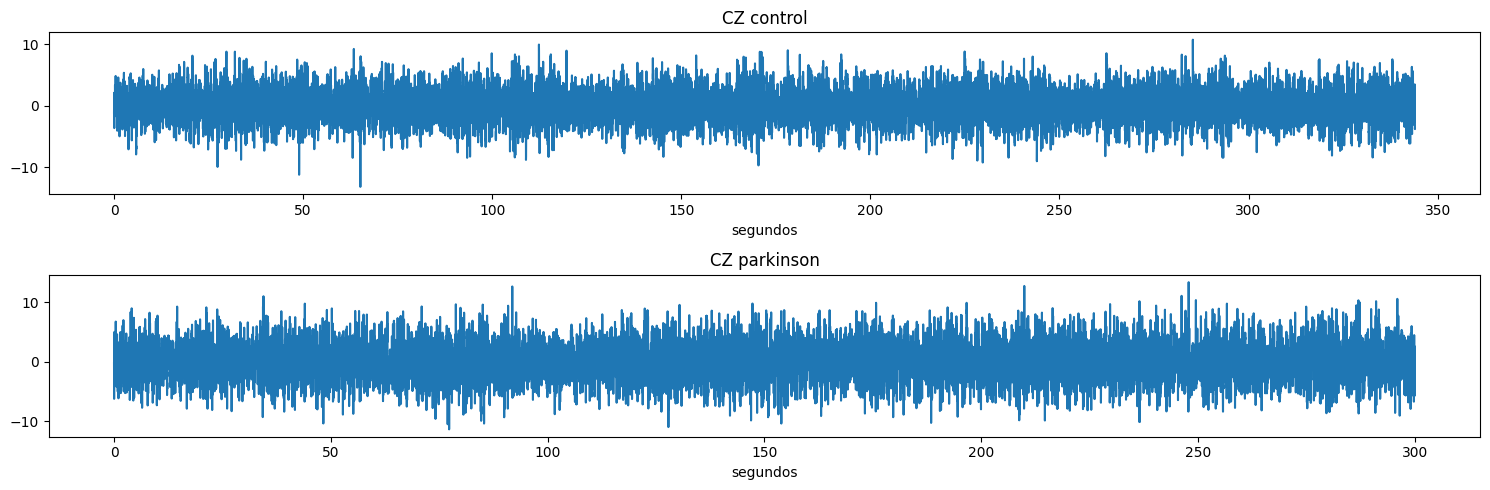

In [130]:
#grafica de señales
plt.figure(figsize=(15,5))
plt.subplot(211)
plt.plot(t_control,control)
plt.title('CZ control')
plt.xlabel('segundos')
plt.subplot(212)
plt.plot(t_parkinson,parkinson)
plt.title('CZ parkinson')
plt.xlabel('segundos')
plt.tight_layout()

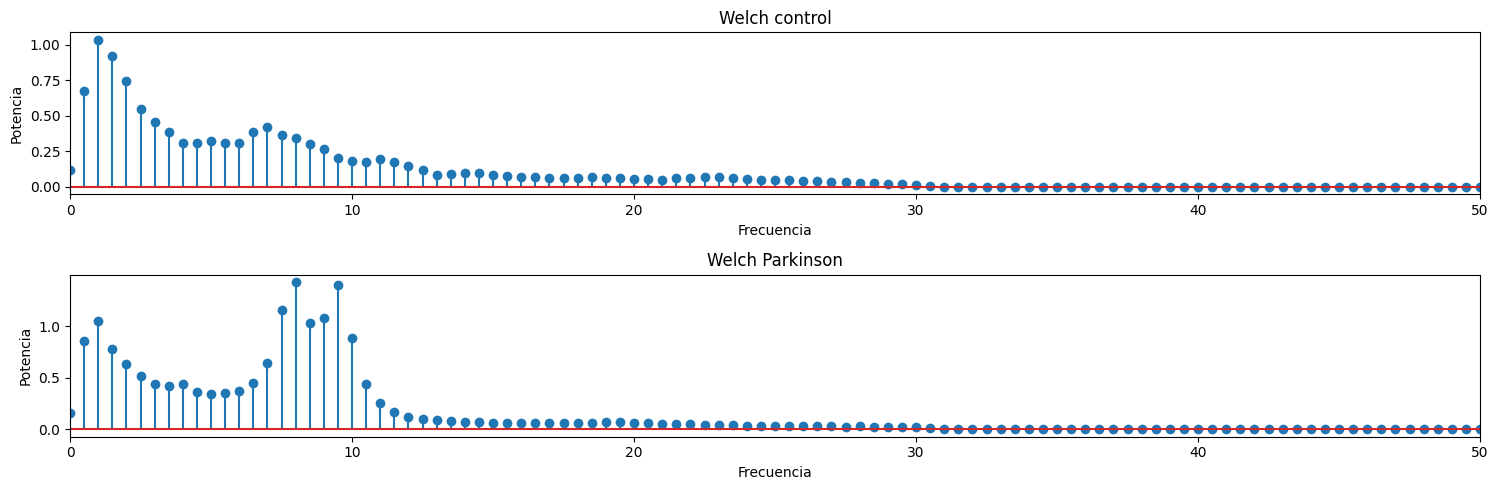

In [131]:
#welch
from scipy.signal import welch as pwelch
nperseg=2000 #ancho de ventana. usado en literatura 1-2 seg
noverlap=int(nperseg/2) #solapamiento de las ventanas. en literatura se suele usar 50-75%
f_control, Pxx_control =pwelch(control, fs, 'hann', nperseg, noverlap) #hann = hanning o Hamming?
f_parkinson, Pxx_parkinson =pwelch(parkinson, fs, 'hann', nperseg, noverlap)
plt.figure(figsize=(15,5))
plt.subplot(211)
plt.stem(f_control,Pxx_control)
plt.title('Welch control')
plt.xlabel('Frecuencia')
plt.ylabel('Potencia')
plt.xlim([0,50])
#plt.ylim([0,1.5])
plt.subplot(212)
plt.stem(f_parkinson,Pxx_parkinson)
plt.title('Welch Parkinson')
plt.xlabel('Frecuencia')
plt.ylabel('Potencia')
plt.xlim([0,50])
#plt.ylim([0,1.5])
plt.tight_layout()

El ancho de ventana está relacionada con la precisión en tiempo y frecuencia, donde a mayor tamaño hay una mayor precisión en frecuencia dado que a más grande la ventana, mayor es el rango de frecuencias que se incluyen en el espectro. Una ventana de 1 segundo no incluiría frecuencias de 0.1 Hz por ejemplo.
El porcentaje de solapamiento, por su parte suaviza las transiciones entre ventanas, por tanto se puede esperar que a mayor solapamiento haya un menor efecto de artefactos de borde, sin embargo también incrementaría la carga computacional.

En vista de que hay que realizar un análisis comparativo de los espectros, se podría seleccionar un ancho de ventana grande para una mejor precisión en frecuencia, sin embargo, en la literatura se ha mencionado que para el estudio de pacientes con enfermedad de Parkinson y sanos se ve una diferencia en las frecuencias de 10-15Hz, así que para reducir carga computacional se puede escoger un ancho de ventana que permita una correcta toma de estas frecuencias, no obstante, para este caso (sólo dos señales) no es requerido.

**Análisis comparativo**

Se puede observar gráficamente en el espectro que hay una diferencia en la banda de frecuencia entre 5 y 15 Hz, mientras que en el resto de las frecuencias se observa un comportamiento similar. Esto puede sugerir que en pacientes con parkinson, la actividad de las ondas alfa podría ser mayor. Por lo tanto se procede a realizar el análisis en el rango de frecuencias correspondientes a alfa (7-13 Hz).

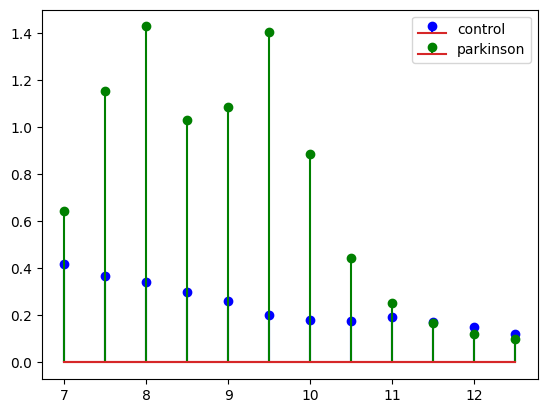

In [132]:
from scipy import stats
#np.where(f_parkinson == 15)
alpha=0.05
wcontrol=Pxx_control[14:26]
wparkinson=Pxx_parkinson[14:26]
wtime=f_control[14:26]
#graficas de segmentos
plt.stem(wtime,wcontrol,'b',markerfmt='bo',label='control')
plt.stem(wtime,wparkinson,'g',markerfmt='go',label='parkinson')
plt.legend()


In [133]:
#supuesto de supuesto de normalidad
stat, p_value = stats.shapiro(wcontrol)
if p_value > alpha:
    print('Los datos de control distribuyen normal')
else:
    print('Los datos de control no distribuyen normal')
#para parkinson
stat, p_value = stats.shapiro(wparkinson)
if p_value > alpha:
    print('Los datos de parkinson distribuyen normal')
else:
    print('Los datos de parkinson no distribuyen normal')

Los datos de control distribuyen normal
Los datos de parkinson distribuyen normal


Dado que ambos conjuntos de datos cumplen con el supuesto de normalidad entonces se realiza la prueba t de student para determinar si pueden ser considerados como diferentes.

In [134]:
statistic, p_value = stats.ttest_ind(wcontrol,wparkinson)
if p_value > alpha:
    print("No hay evidencia suficiente para rechazar la hipótesis nula")
else:
    print("Se rechaza la hipótesis nula en favor de la hipótesis alternativa")

Se rechaza la hipótesis nula en favor de la hipótesis alternativa


Como en la prueba t de student se rechazó la hipótesis nula, entonces puede decirse que las medias de las ondas alfa del paciente control y el paciente parkinson son diferentes. Esto puede ser un indicio de que en los pacientes de parkinson se registra una mayor actividad de ondas alfa que en pacientes normales.

Bibliografía:
- Sun, P. (2014). Comparison of STFT and Wavelet Transform in Timefrequency Analysis. University of Gavle.
- Mathematics and Signal Processing for Biomechanics. Tomado de: https://www1.udel.edu/biology/rosewc/kaap686/notes/windowing.html#:~:text=The%20first%20side%20lobe%20of,is%20better%20in%20that%20regard
- https://d1wqtxts1xzle7.cloudfront.net/67471983/IJEET_12_05_008-libre.pdf?1622454030=&response-content-disposition=inline%3B+filename%3DA_NOVEL_APPROACH_FOR_THE_EARLY_DETECTION.pdf&Expires=1713730889&Signature=YpYcb7gGKouWHUPUpUunVkCZj-nsnBv2PKegnFl31AopNk4FRu34R8qjX8DLXkATuZLwRHtexI0bMa-hqVCrT1hB65jJVjKQuUhU0CbSGsus5435rYqtUibrBEbUu29d5t6LVjAHk0AruNxl~doOvnHbHIzY5lYWTsh2dITTGXEGrRkGKxOQpdLwDvRmPGIMpkg8tSHWNsOiA~ZjMg-~cGio0wd9Z97IEtvZPB6kofOYpqcuXf0Kr-1xqvu2kqFfl4AIIDGUyQSp8Y~AI1PDSdLGZ~YxWBJ2UQm1byILQWumm2WN5bPrim4E6ga7qt6A3BAJW3-3MeXyGlQA7Mo20g__&Key-Pair-Id=APKAJLOHF5GGSLRBV4ZA
